In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import h, c, k
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
# Set the font to Times New Roman
matplotlib.rcParams['font.family'] = 'Times New Roman'

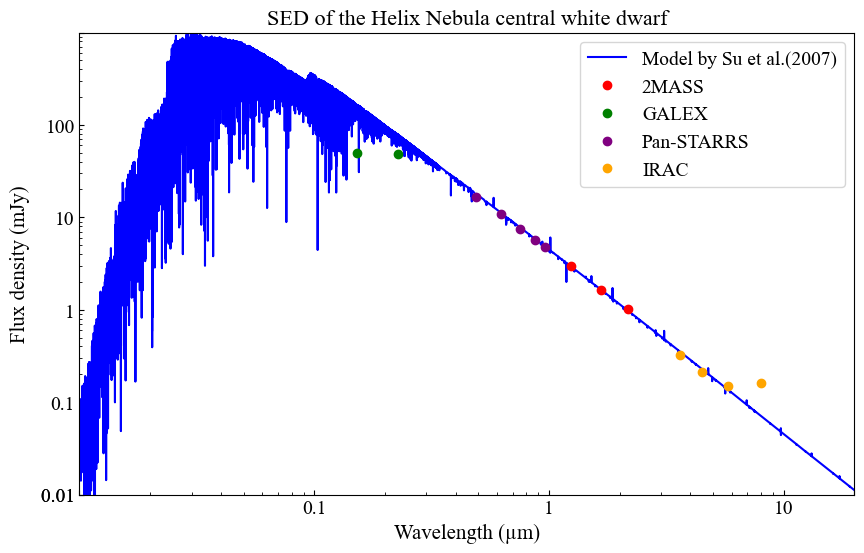

In [2]:
# Observational data
obs_wavelengths = np.array([
    1.235, 1.662, 2.159, 0.1516, 0.2267, 0.4866, 0.6215, 0.7545, 0.8679, 0.9633,
    24, 70, 3.6, 4.5, 5.8, 8
])

obs_flux_densities = np.array([
    2.949091973, 1.637947421, 1.010951812, 49.89146411, 48.80072217, 16.41444673,
    10.74747018, 7.549292436, 5.704088419, 4.767670674, 48.4, 224, 0.325, 0.213, 0.148, 0.16
])

# Function to convert Angstroms to microns
def angstrom_to_microns(wavelength_angstrom):
    return wavelength_angstrom / 1e4

# Function to convert flux density from erg/s/cm^2/Angstrom to mJy
def flux_density_to_mjy(flux_density, wavelength_angstrom):
    # Convert wavelength from Angstrom to meters for the conversion
    wavelength_m = wavelength_angstrom * 1e-10
    # Convert flux density using the factor (1e26) to get from erg/s/cm^2/Hz to Jy and then to mJy
    # and using c / lambda^2 to convert from per Angstrom to per Hz (since F_lambda dlambda = F_nu dnu)
    flux_density_mjy = flux_density * 1e26 * wavelength_m**2 / c
    return flux_density_mjy

# Load the model data from the file
file_path_3 = '/Users/leylaiskandarli/Desktop/spectral data/wd_110000g68 (1).txt'
model_data_3 = pd.read_csv(file_path_3, sep='\s+', header=None)

wavelength_model_microns3 = angstrom_to_microns(model_data_3[0])
flux_density_model_mJy3 = flux_density_to_mjy(model_data_3[1], model_data_3[0])

# Data provided by the user
data = [
    ("J", "2MASS", 1.235, 2.949091973),
    ("H", "2MASS", 1.662, 1.637947421),
    ("K", "2MASS", 2.159, 1.010951812),
    ("FUV", "GALEX", 0.1516, 49.89146411),
    ("NUV", "GALEX", 0.2267, 48.80072217),
    ("g", "Pan-STARRS", 0.4866, 16.41444673),
    ("r", "Pan-STARRS", 0.6215, 10.74747018),
    ("i", "Pan-STARRS", 0.7545, 7.549292436),
    ("z", "Pan-STARRS", 0.8679, 5.704088419),
    ("y", "Pan-STARRS", 0.9633, 4.767670674),
    ("IRAC", "IRAC", 3.6, 0.325),
    ("IRAC", "IRAC", 4.5, 0.213),
    ("IRAC", "IRAC", 5.8, 0.148),
    ("IRAC", "IRAC", 8, 0.16)
]

# Organizing the data for plotting
catalogs = set()  # To keep track of the catalogs we have
wavelengths = []
flux_densities = []
symbols = []  # To keep track of the symbols
for band, catalog, wavelength, flux_density in data:
    wavelengths.append(wavelength)
    flux_densities.append(flux_density)
    symbols.append(band)
    catalogs.add(catalog)


# Creating the plot with a corrected legend
plt.figure(figsize=(10, 6))
#Scale Factor
scale_factor_3 = 5.868831492892263e-14

# Plot the model SED as a line
plt.plot(wavelength_model_microns3, flux_density_model_mJy3*scale_factor_3, linestyle='-', color='blue', label='Model by Su et al.(2007)')

# Define marker styles and colors for each catalog
catalog_styles = {
    '2MASS': ('o', 'red'), 
    'GALEX': ('o', 'green'), 
    'Pan-STARRS': ('o', 'purple'),
    'WISE': ('o', 'orange'), 
    'IRAC': ('o', 'orange')
}

# To keep track of which catalogs have been added to the legend
catalogs_added = set()

# Plot each point
for band, catalog, wavelength, flux_density in data:
    marker, color = catalog_styles[catalog]
    if catalog not in catalogs_added:
        plt.loglog(wavelength, flux_density, marker=marker, color=color, linestyle='', label=catalog)
        catalogs_added.add(catalog)
    else:
        plt.loglog(wavelength, flux_density, marker=marker, color=color, linestyle='', label='_nolegend_')


# Plot the observational data as scatter points
#plt.scatter(obs_wavelengths, obs_flux_densities, color='red', label='Central White Dwarf Data')

# Enhancing the plot
plt.xlabel('Wavelength (µm)', fontsize=15)
plt.ylabel('Flux density (mJy)', fontsize=15)
plt.title('SED of the Helix Nebula central white dwarf', fontsize=16)
plt.loglog()  # Using log-log scale due to the wide range of values
plt.legend(fontsize="small")
plt.xlim((0.01, 20))
plt.ylim((0.01, 1e3))

# Setting the tick marks to be inside
plt.tick_params(direction='in', which='both', labelsize=14)

# Manually setting the log scale ticks
plt.xticks([0.01, 0.1, 1, 10, 20], ['', '0.1', '1', '10', ''])
plt.yticks([0.01,0.01, 0.1, 1, 10, 100, 1000], ['' ,' 0.01' ,'0.1', '1', '10', '100', ''])

plt.legend(fontsize=14)

plt.show()



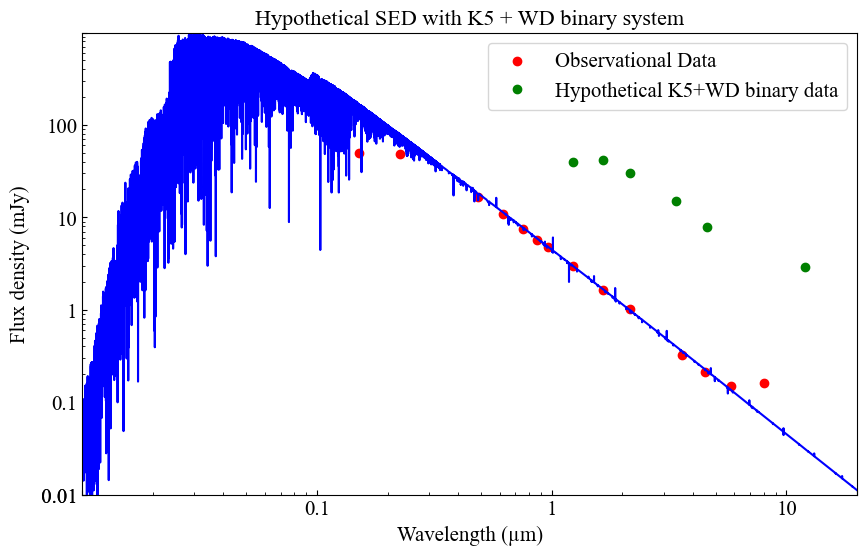

In [3]:
#K5 star + WD hypothetical binary system SED at Helix distance (200parsecs)
# Load the data from the provided content - K5 + WD
data = {
    "Spectral Type": ["K5", "K5", "K5", "K5", "K5", "K5", "K5" ],
    "Band": ["J", "H", "K", "W1", "W2", "W3", "W4"],
    "Wavelength (microns)": [1.235, 1.662, 2.159, 3.4, 4.6, 12, 22],
    "Flux density (mJy)": [39.4751258, 41.23055966, 30.12111601, 15.10737794, 7.896820094, 2.925451926, 72.35714345],
    "Flux density ERROR (mJy)": [0, 0, 0, 0, 0, 0, 0]
}


# Create a DataFrame
df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(10, 6))

# Error bars: yerr will be the flux density error
# Plot the model SED as a line
plt.plot(wavelength_model_microns3, flux_density_model_mJy3*scale_factor_3, linestyle='-', color='blue')

# Plot the observational data as scatter points
plt.scatter(obs_wavelengths, obs_flux_densities, color='red', label='Observational Data')


plt.errorbar(df['Wavelength (microns)'], df['Flux density (mJy)'],  fmt='o', color='green', capsize=5, label = 'Hypothetical K5+WD binary data')

plt.title('Hypothetical SED with K5 + WD binary system', fontsize = "16")
plt.xlabel('Wavelength (µm)', fontsize = "15")
plt.ylabel('Flux density (mJy)', fontsize = "15")
plt.loglog() 
plt.xlim((0.01, 20))
plt.ylim((0.01, 1e3))

# Setting the tick marks to be inside
plt.tick_params(direction='in', which='both', labelsize=15)

# Manually setting the log scale ticks
plt.xticks([0.01, 0.1, 1, 10, 20], ['', '0.1', '1', '10', ''])
plt.yticks([0.01,0.01, 0.1, 1, 10, 100, 1000], ['' ,' 0.01' ,'0.1', '1', '10', '100', ''])
plt.legend(fontsize = "15")
# Display the plot
plt.show()

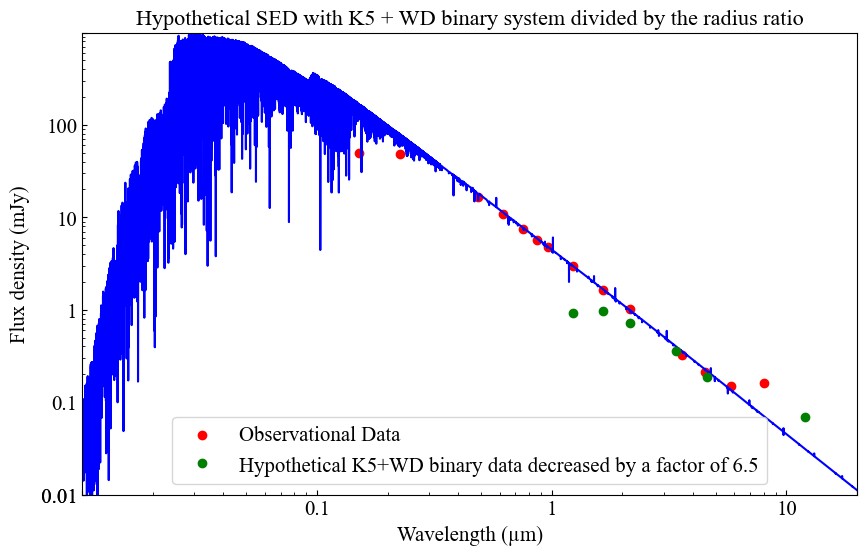

In [4]:
# Load the data from the provided content - K5 + WD
data = {
    "Spectral Type": ["K5", "K5", "K5", "K5", "K5", "K5", "K5" ],
    "Band": ["J", "H", "K", "W1", "W2", "W3", "W4"],
    "Wavelength (microns)": [1.235, 1.662, 2.159, 3.4, 4.6, 12, 22],
    "Flux density (mJy)": [0.930358845, 0.971731314, 0.709901391, 0.356054158, 0.186114072, 0.068947724, 1.705329801],
    "Flux density ERROR (mJy)": [0, 0, 0, 0, 0, 0, 0]
}


# Create a DataFrame
df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(10, 6))

# Error bars: yerr will be the flux density error
# Plot the model SED as a line
plt.plot(wavelength_model_microns3, flux_density_model_mJy3*scale_factor_3, linestyle='-', color='blue')

# Plot the observational data as scatter points
plt.scatter(obs_wavelengths, obs_flux_densities, color='red', label='Observational Data')


plt.errorbar(df['Wavelength (microns)'], df['Flux density (mJy)'],  fmt='o', color='green', capsize=5, label = 'Hypothetical K5+WD binary data decreased by a factor of 6.5')

plt.title('Hypothetical SED with K5 + WD binary system divided by the radius ratio', fontsize = "16")
plt.xlabel('Wavelength (µm)', fontsize = "15")
plt.ylabel('Flux density (mJy)', fontsize = "15")
plt.loglog() 
plt.xlim((0.01, 20))
plt.ylim((0.01, 1e3))

# Setting the tick marks to be inside
plt.tick_params(direction='in', which='both', labelsize=15)

# Manually setting the log scale ticks
plt.xticks([0.01, 0.1, 1, 10, 20], ['', '0.1', '1', '10', ''])
plt.yticks([0.01,0.01, 0.1, 1, 10, 100, 1000], ['' ,' 0.01' ,'0.1', '1', '10', '100', ''])
plt.legend(fontsize = "15")
# Display the plot
plt.show()